In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=b84d23953cff32a6063fc762b3c718418fd313ec8029b9341ae043f090957570
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance

In [0]:
%config InlineBackend.figure_format = 'retina'

In [0]:
start_date = '2016-02-01'
end_date = '2019-12-31'

In [6]:
data = yfinance.download("AUDUSD=X CADUSD=X CHFUSD=X \
                          CNYUSD=X DKKUSD=X EURUSD=X \
                          GBPUSD=X HKDUSD=X JPYUSD=X \
                          KZTUSD=X NOKUSD=X NZDUSD=X \
                          PLNUSD=X RUBUSD=X SEKUSD=X",
                        start=start_date, end=end_date)

[*********************100%***********************]  15 of 15 completed


In [7]:
data['Close'].head()

AUDUSD=X  CADUSD=X  CHFUSD=X  ...  PLNUSD=X  RUBUSD=X  SEKUSD=X
Date                                      ...                              
2016-02-01  0.706864  0.715676  0.976086  ...  0.245228  0.013256  0.116426
2016-02-02  0.711086  0.716846  0.980873  ...  0.247986  0.012943  0.117306
2016-02-03  0.702988  0.711238  0.981653  ...  0.248004  0.012545  0.116964
2016-02-04  0.715461  0.724942  0.994827  ...  0.251062  0.012999  0.118491
2016-02-05  0.719942  0.726998  1.006654  ...  0.253291  0.013026  0.119067

[5 rows x 15 columns]

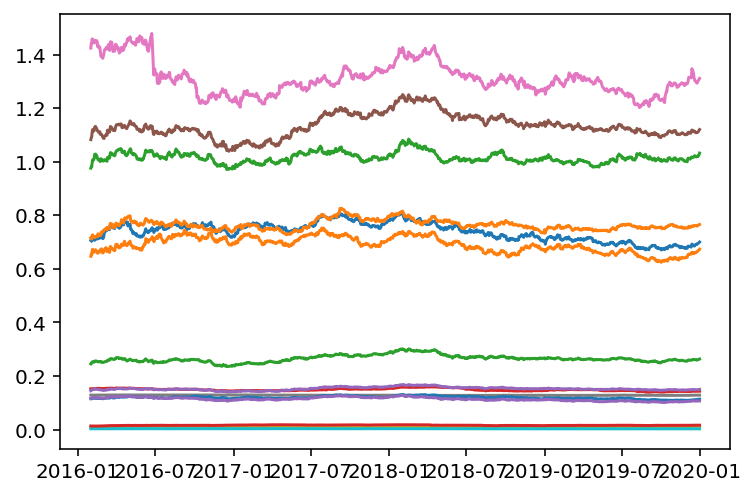

In [8]:
plt.plot(data['Close'])
plt.show()

In [0]:
new_data = data['Close'].interpolate(method='polynomial', order=3)

In [10]:
new_data.columns

Index(['AUDUSD=X', 'CADUSD=X', 'CHFUSD=X', 'CNYUSD=X', 'DKKUSD=X', 'EURUSD=X',
       'GBPUSD=X', 'HKDUSD=X', 'JPYUSD=X', 'KZTUSD=X', 'NOKUSD=X', 'NZDUSD=X',
       'PLNUSD=X', 'RUBUSD=X', 'SEKUSD=X'],
      dtype='object')

In [0]:
new_data['day'] = new_data.index.day
new_data['month'] = new_data.index.month

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
Xy = new_data[['day', 'month', 'RUBUSD=X']].values

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(Xy)

In [15]:
X = scaled[:,0:2]
X

array([[0.        , 0.09090909],
       [0.03333333, 0.09090909],
       [0.06666667, 0.09090909],
       ...,
       [0.86666667, 1.        ],
       [0.96666667, 1.        ],
       [1.        , 1.        ]])

In [16]:
y = scaled[:, 2]
y

array([0.13219693, 0.0747949 , 0.00151789, ..., 0.65202748, 0.65797371,
       0.66180284])

In [17]:
X.shape

(1019, 2)

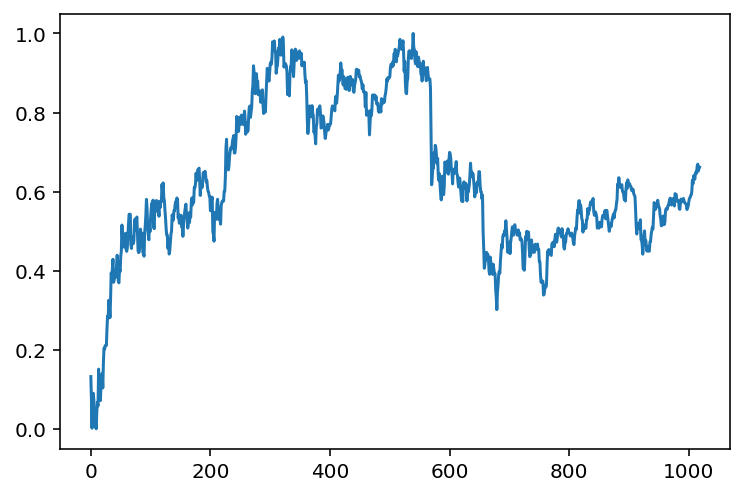

In [18]:
plt.plot(y)
plt.show()

In [0]:
X_train, X_test = X[:500], X[500:]
y_train, y_test = y[:500], y[500:]

In [20]:
y_train.shape

(500,)

In [21]:
y_test.shape

(519,)

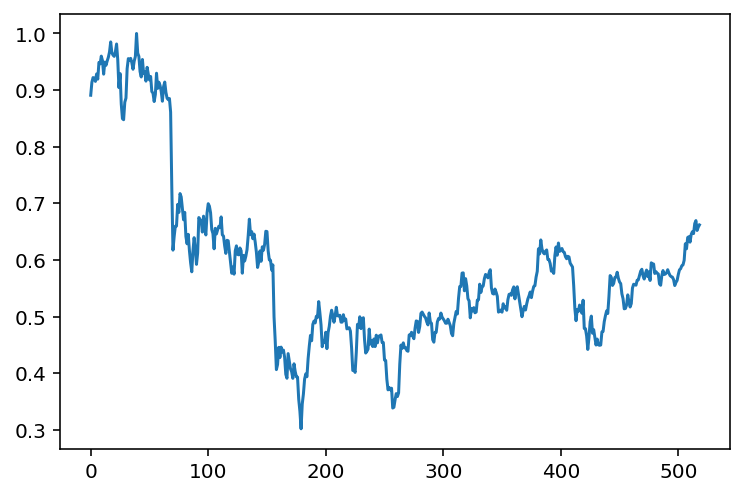

In [22]:
plt.plot(y_test)

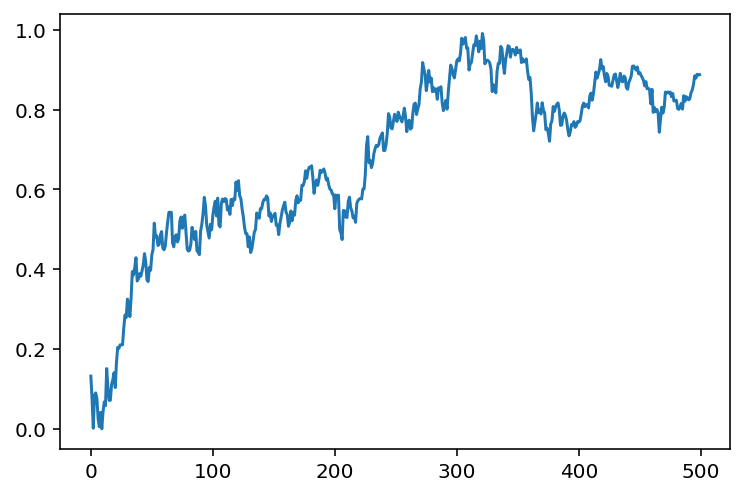

In [23]:
plt.plot(y_train)

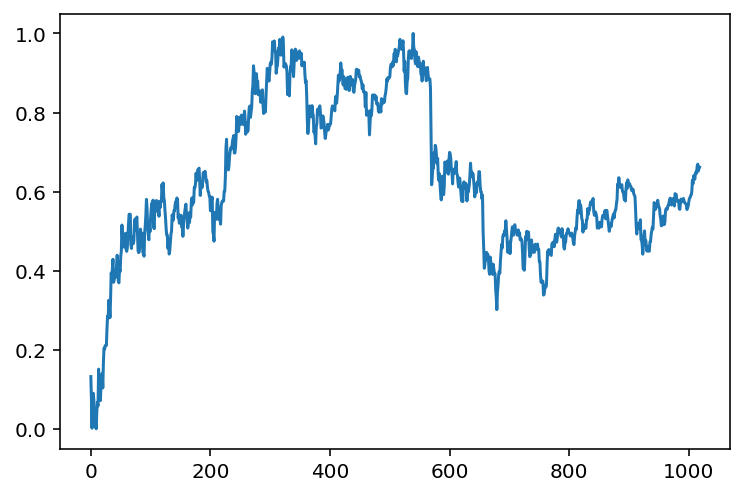

In [24]:
plt.plot(y)

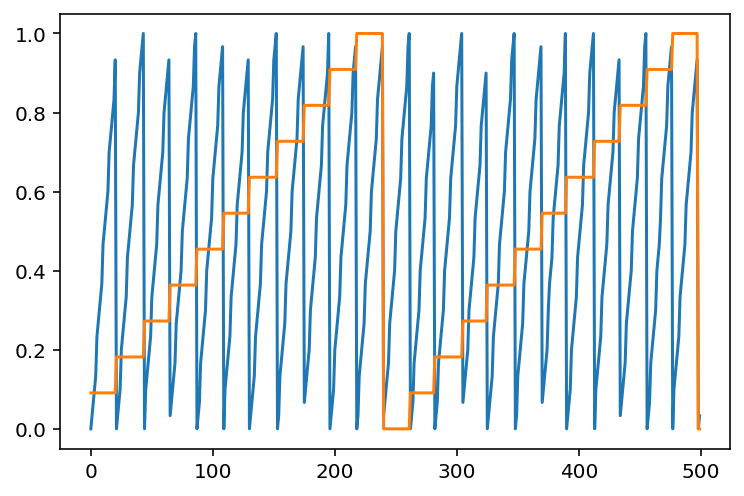

In [25]:
plt.plot(X_train)
plt.show()

In [26]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from statsmodels.tsa.api import VAR

In [0]:
model = sm.tsa.statespace.SARIMAX(y_train, exog=X_train)

In [0]:
results = model.fit()

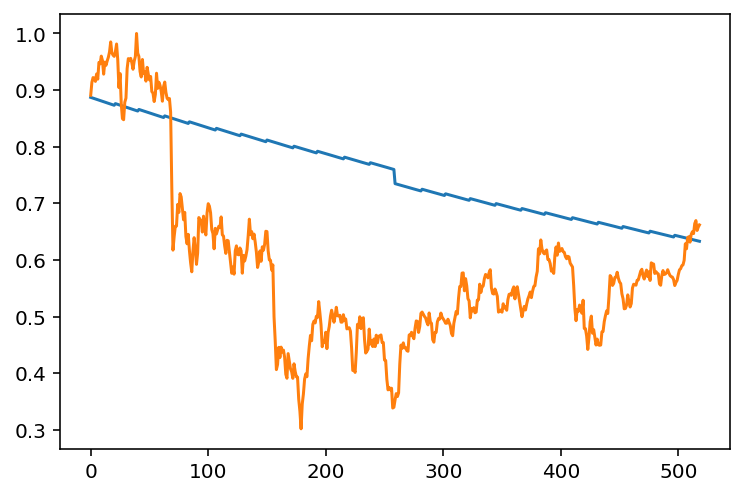

In [30]:
plt.plot(results.forecast(len(X_test), exog=X_test))
plt.plot(y_test)
plt.show()

In [37]:
for name in new_data.columns:

  Xy = new_data[['day', 'month', name]].values

  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(Xy)

  X = scaled[:,0:2]
  y = scaled[:, 2]

  X_train, X_test = X[:500], X[500:]
  y_train, y_test = y[:500], y[500:]

  model = sm.tsa.statespace.SARIMAX(y_train, exog=X_train, order=(1,0,0))
  results = model.fit()

  fig, ax = plt.subplots(figsize=(20,10))
  plt.plot(results.forecast(len(X_test), exog=X_test))
  plt.plot(y_test)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [0]:
X = new_data.values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(X)

X_train, X_test = scaled[:500], scaled[500:]

In [0]:
model = VAR(X_train)

In [0]:
results = model.fit(ic='aic')

In [0]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 15, May, 2020
Time:                     23:05:30
--------------------------------------------------------------------
No. of Equations:         17.0000    BIC:                   -126.826
Nobs:                     499.000    HQIC:                  -128.395
Log likelihood:           20556.7    FPE:                6.29003e-57
AIC:                     -129.409    Det(Omega_mle):     3.44368e-57
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.115426         0.033145            3.483           0.000
L1.y1          0.895088         0.026749           33.462           0.000
L1.y2          0.066576         0.026915            2.474           0.013
L1.y3          0.

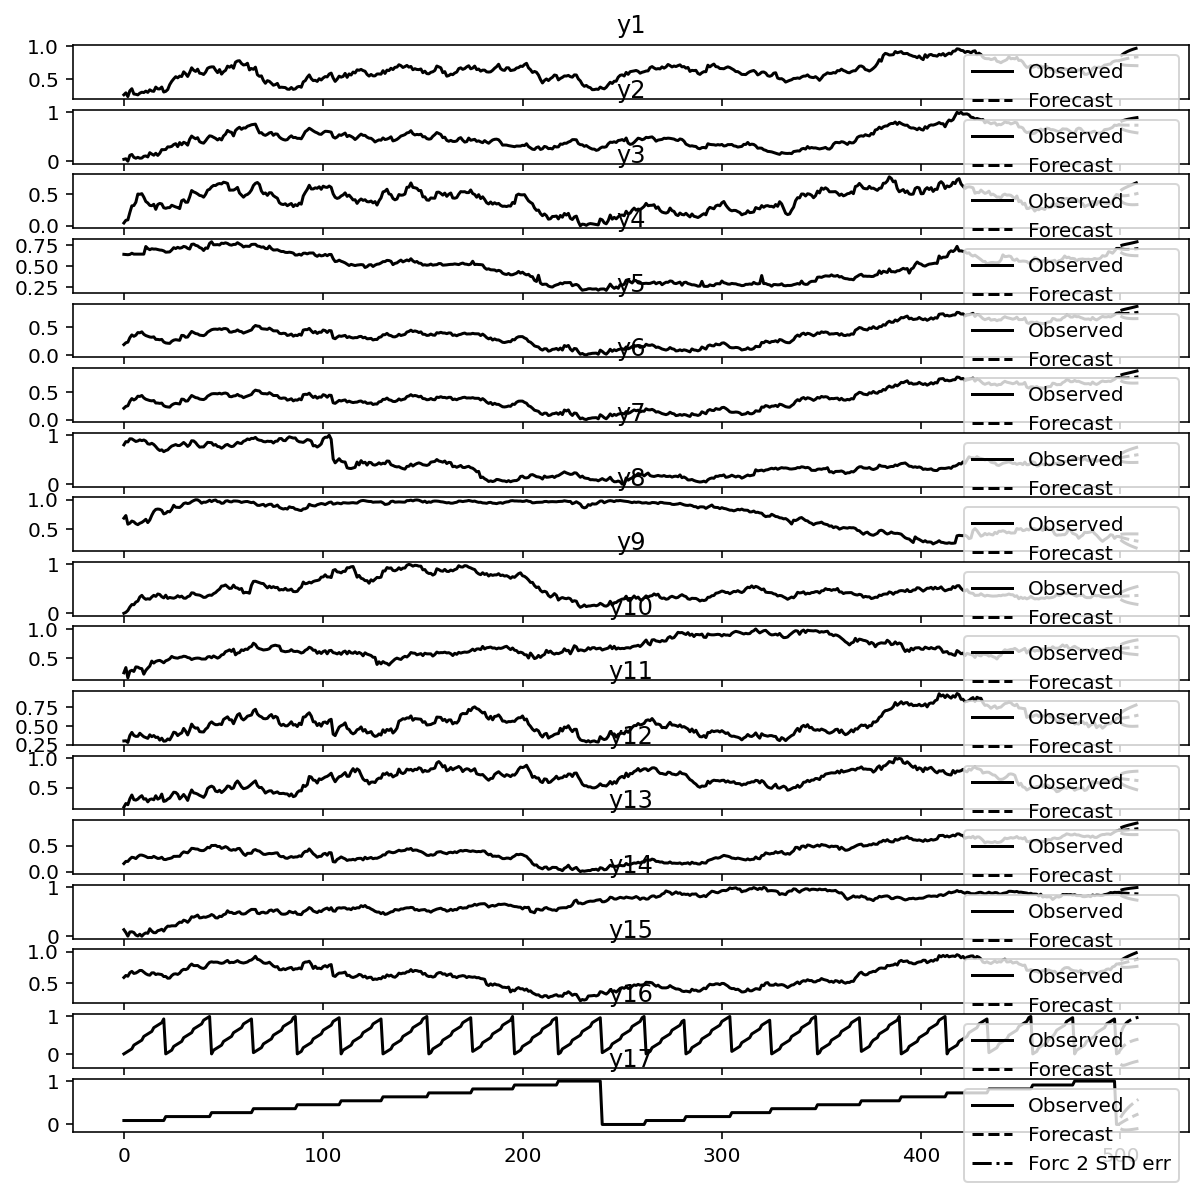

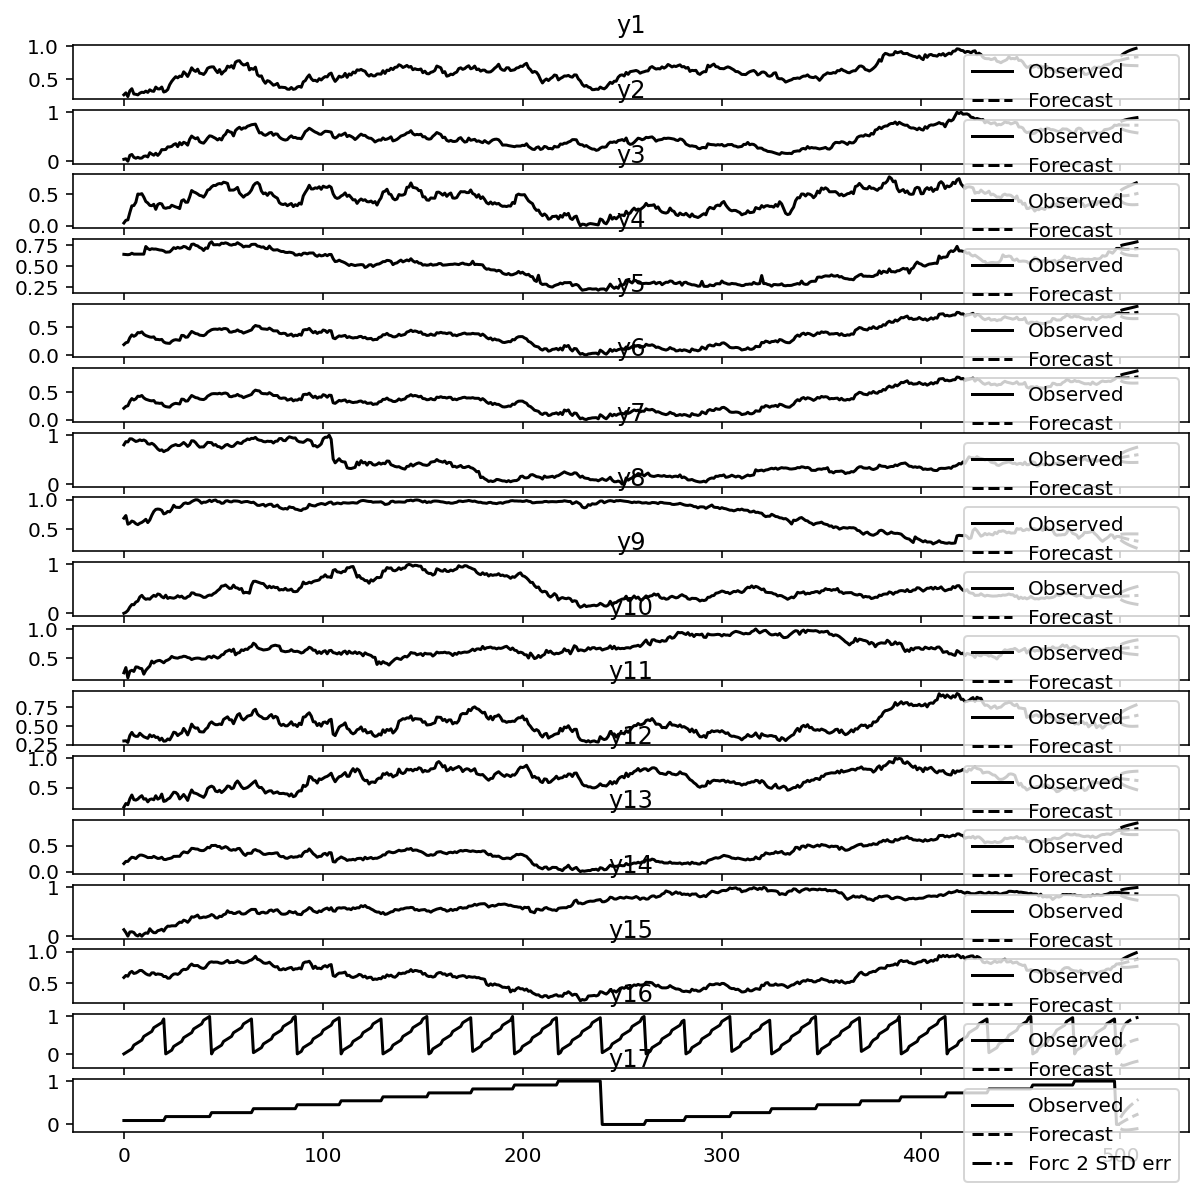

In [0]:
results.plot_forecast(10)

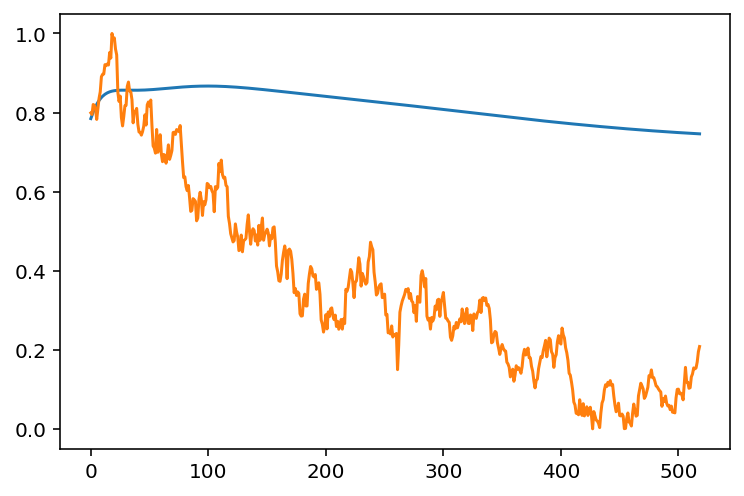

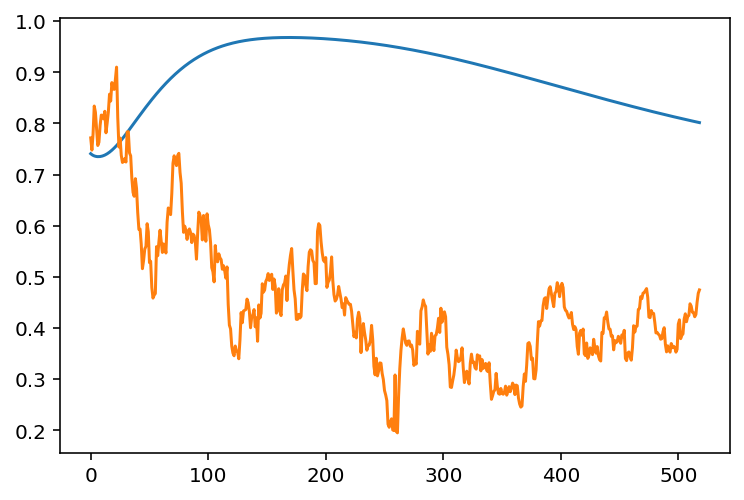

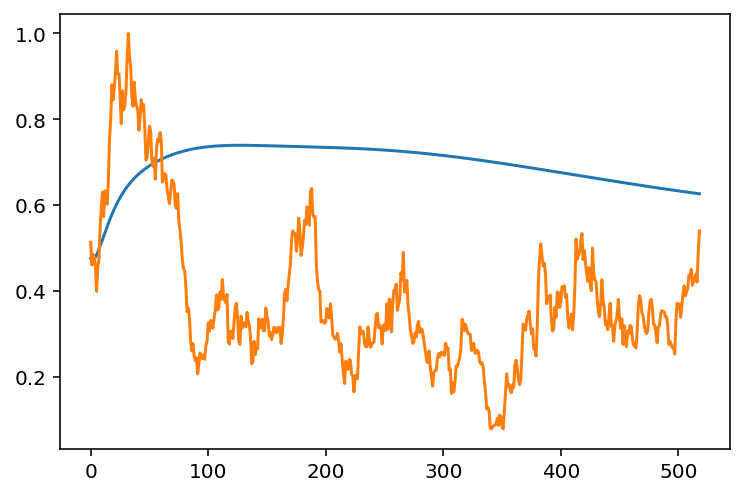

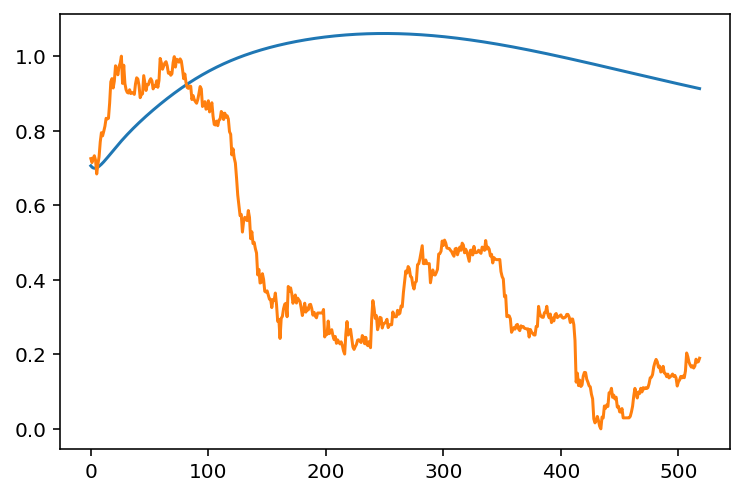

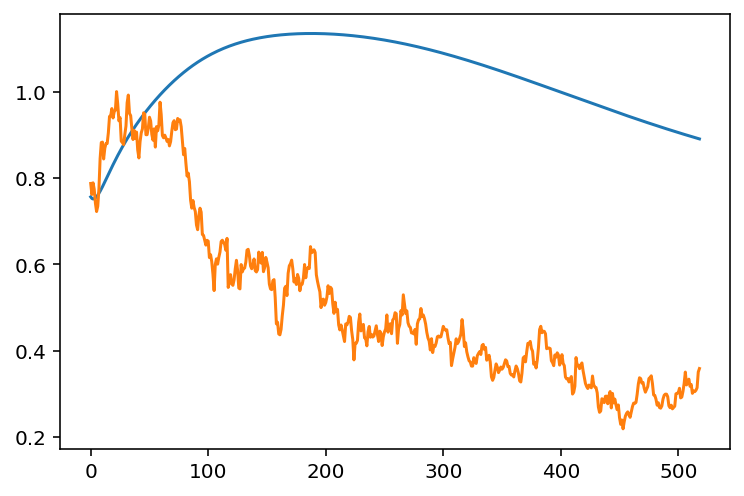

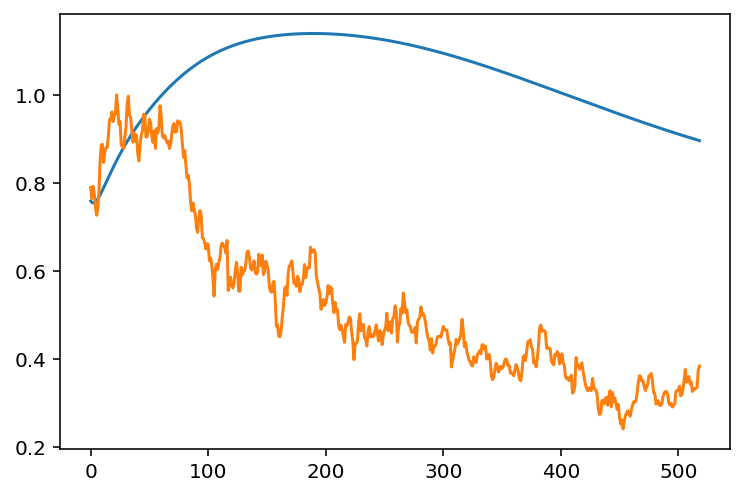

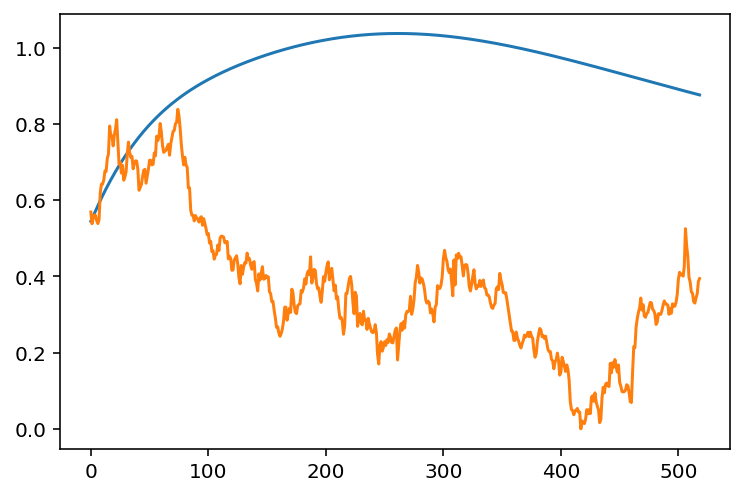

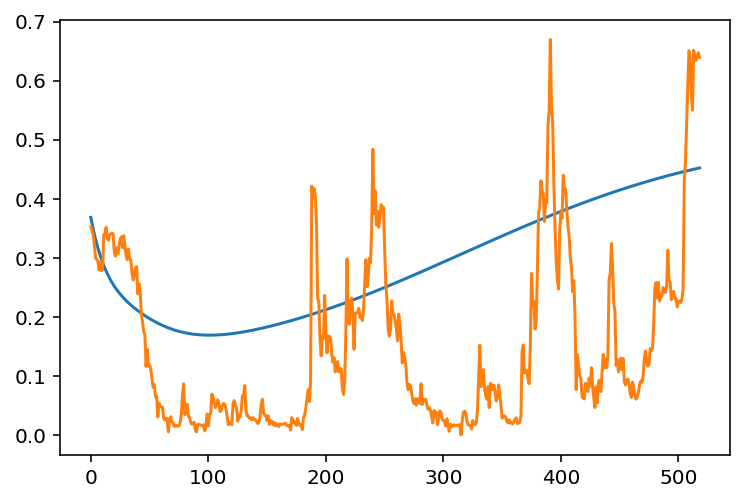

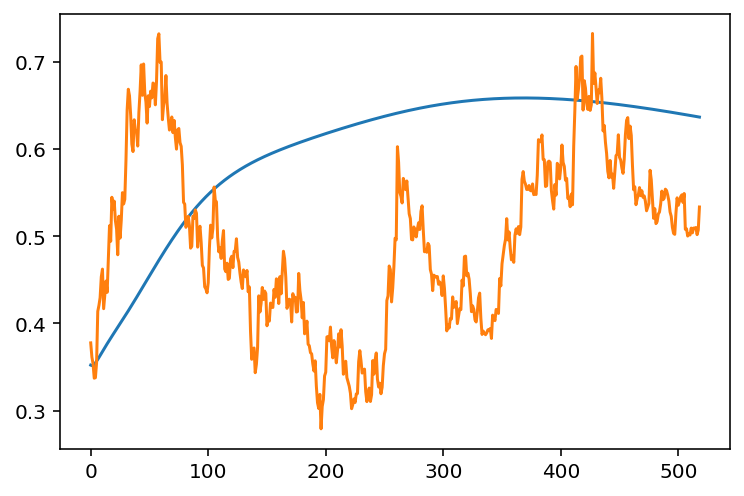

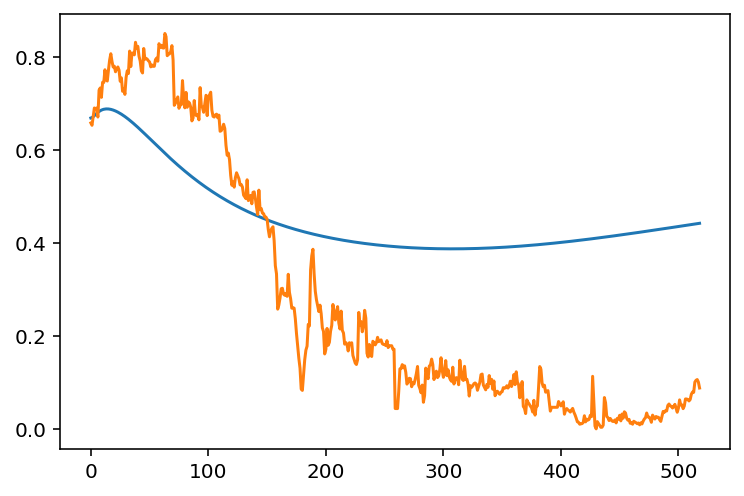

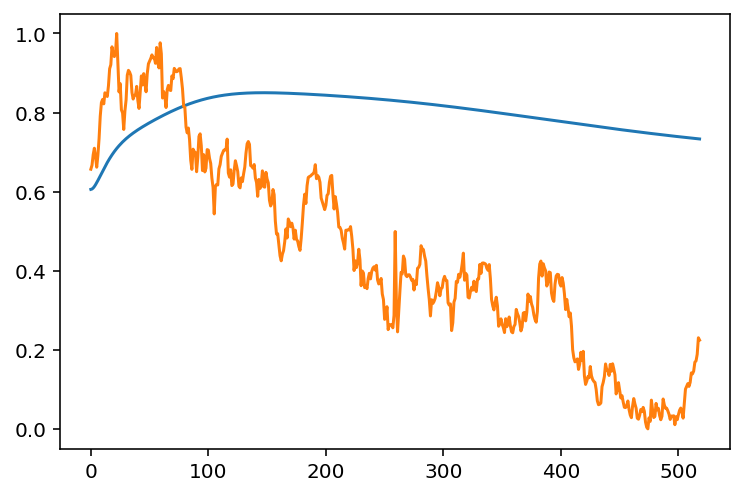

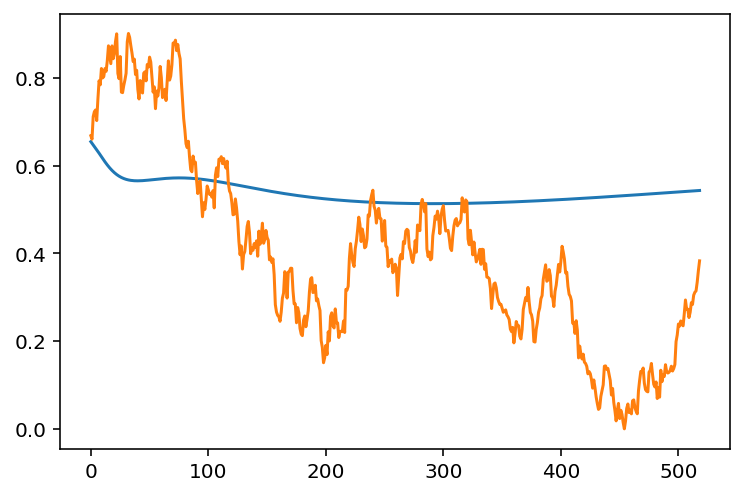

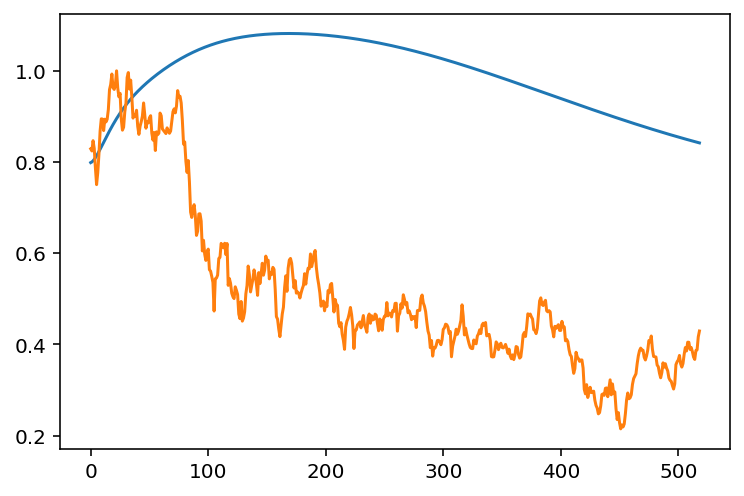

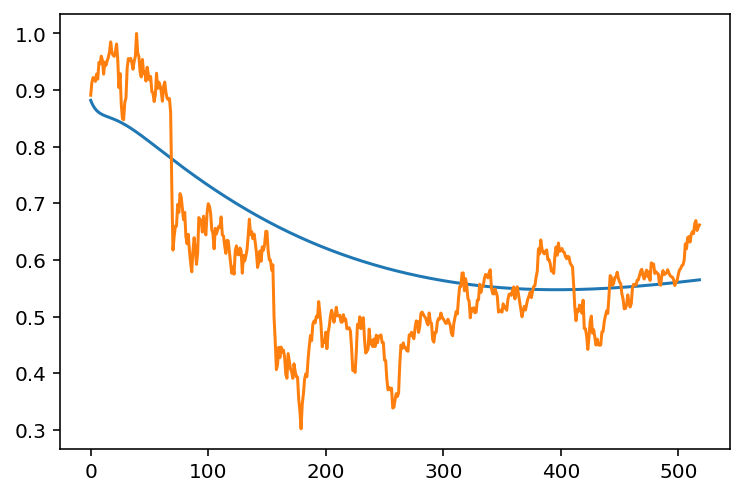

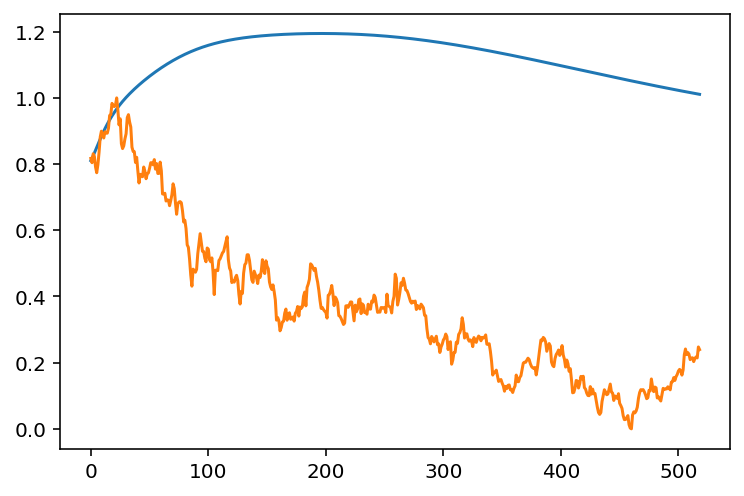

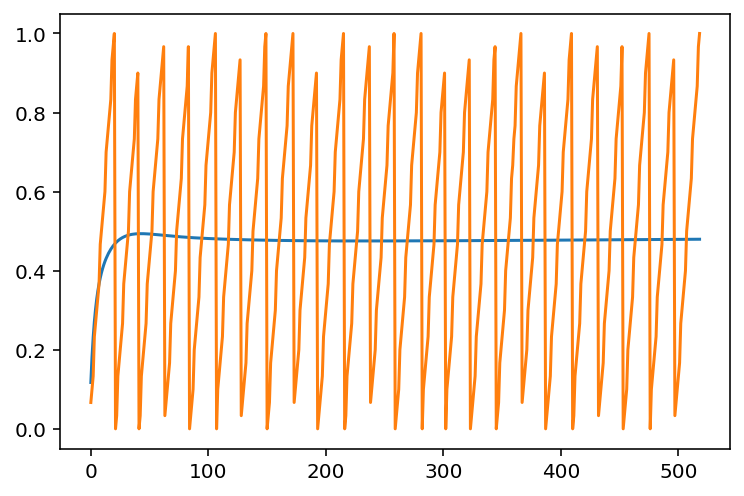

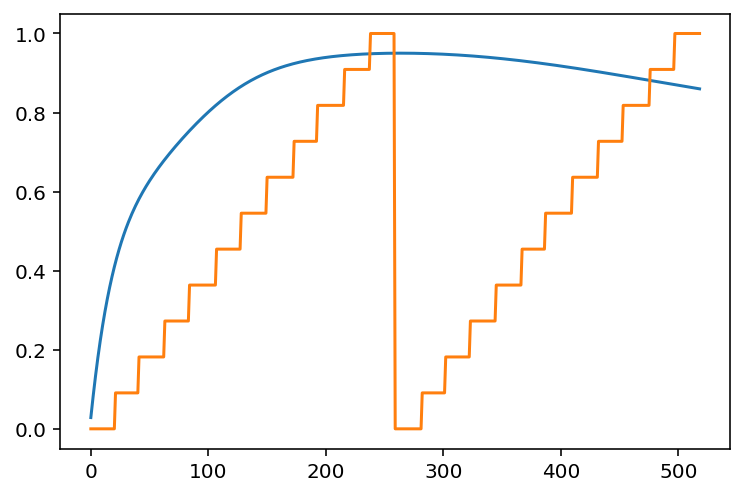

In [0]:
for i in range(X_train.shape[1]):
  plt.plot(results.forecast(X_train, len(X_test))[:, i])
  plt.plot(X_test[:, i])
  plt.show()